In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:

# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(7) # set seed for reproducibility
random_1 = random_1.normal(shape=(3, 2))

In [ ]:
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.3240396 ,  0.28785667],
       [-0.8757901 , -0.08857018],
       [ 0.69211644,  0.84215707]], dtype=float32)>

In [ ]:
rand_own = tf.random.Generator.from_seed(42)
a = rand_own.normal(shape=(4,3))

In [ ]:
a

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702,  0.07595026],
       [-1.2573844 , -0.23193763, -1.8107855 ],
       [ 0.09988727, -0.50998646, -0.7535805 ],
       [-0.57166284,  0.1480774 , -0.23362993]], dtype=float32)>

In [ ]:
tf.random.shuffle(a)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-1.2573844 , -0.23193763, -1.8107855 ],
       [-0.57166284,  0.1480774 , -0.23362993],
       [-0.7565803 , -0.06854702,  0.07595026],
       [ 0.09988727, -0.50998646, -0.7535805 ]], dtype=float32)>

In [ ]:
tf.size(a)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [ ]:
tf.zeros([3,5,1])

<tf.Tensor: shape=(3, 5, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.]]], dtype=float32)>

In [ ]:
a = tf.ones([3,5])
tf.size(a)

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [ ]:
b = tf.reshape(a,shape=(5,3))
b

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
tf.matmul(a,b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]], dtype=float32)>

In [ ]:
# Matrix mutliplication with Python operator "@"
a @ b

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]], dtype=float32)>

In [ ]:
b = tf.transpose(a)
b

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
tf.cast(b,dtype=tf.float16)

<tf.Tensor: shape=(5, 3), dtype=float16, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float16)>

In [ ]:
tf.cast(b,dtype=tf.int16)

<tf.Tensor: shape=(5, 3), dtype=int16, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int16)>

In [ ]:
tf.config.list_physical_devices("GPU")     

[]

### Neural Networks using Tensorflow

>  Regression problem

In [ ]:
#Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.11.0


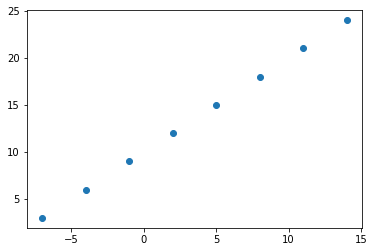

In [ ]:
### Getting the data
import numpy as np
import matplotlib.pyplot as plt

#creating the features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [ ]:
#input and output shapes
house_info = tf.constant(["Bedroom","Bathroom","Garages"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Bathroom', b'Garages'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

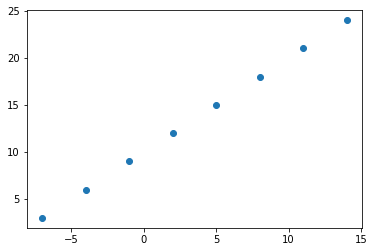

In [ ]:
# Create features (using tensors)
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

In [ ]:

# Take a single example of X
input_shape = x[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(-7.0, <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [ ]:
x.shape,y.shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
# creating the model
#set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 315ms/step - loss: 13.9736 - mae: 13.9736
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 13.8411 - mae: 13.8411
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 13.7086 - mae: 13.7086
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 13.5761 - mae: 13.5761
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.4436 - mae: 13.4436


In [ ]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [ ]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 39ms/step


array([[0.7245142]], dtype=float32)

In [ ]:
#Improve the model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1) 
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 251ms/step - loss: 21.9604 - mae: 21.9604
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 21.5673 - mae: 21.5673
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 21.1742 - mae: 21.1742
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 20.7811 - mae: 20.7811
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 20.4193 - mae: 20.4193
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 20.1380 - mae: 20.1380
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 19.8568 - mae: 19.8568
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 19.5755 - mae: 19.5755
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 19.2943 - mae: 19.2943
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 19.0130 - mae: 19.0130
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 89ms/step


array([[29.255096]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])

model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.0964 - mae: 13.0964
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.0120 - mae: 13.0120
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9276 - mae: 12.9276
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 12.8431 - mae: 12.8431
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 12.7585 - mae: 12.7585
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 12.6738 - mae: 12.6738
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 12.5899 - mae: 12.5899
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 12.5060 - mae: 12.5060
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 12.4221 - mae: 12.4221
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 12.3418 - mae: 12.3418
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[23.604662]], dtype=float32)

In [ ]:
## Evaluating model performance
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

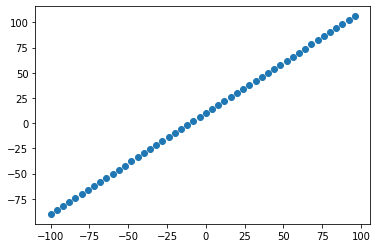

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [ ]:
# checking the length of samples
len(x)

50

In [ ]:
# splitting the data into train-cv-test datasets
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(x,axis=-1),y,epochs=10,verbose=1)

Epoch 1/10
2/2 [==============================] - 0s 7ms/step - loss: 6.4108 - mae: 6.4108
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 5.3181 - mae: 5.3181
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 4.6930 - mae: 4.6930
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 4.1166 - mae: 4.1166
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 3.9993 - mae: 3.9993
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 4.2083 - mae: 4.2083
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 4.4982 - mae: 4.4982
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 4.4183 - mae: 4.4183
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 4.1258 - mae: 4.1258
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 3.9151 - mae: 3.9151


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


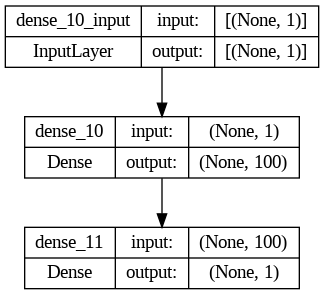

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

In [ ]:
# visualize the model predictions
#y_test VS y_pred

y_pred = model.predict(x_test)

1/1 [==============================] - 0s 72ms/step


In [ ]:
y_pred,y_test

(array([[ 69.02007 ],
        [ 73.54617 ],
        [ 78.072266],
        [ 82.598366],
        [ 87.124466],
        [ 91.650566],
        [ 96.17667 ],
        [100.70277 ],
        [105.228874],
        [109.75497 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

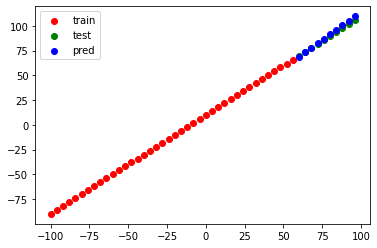

In [ ]:
def plot_predictions(x_train,y_train,x_test,y_test,y_pred):
  plt.scatter(x_train,y_train,c="r",label="train")
  plt.scatter(x_test,y_test,c="g",label="test")
  plt.scatter(x_test,y_pred,c="b",label="pred")
  plt.legend()
plot_predictions(x_train,y_train,x_test,y_test,y_pred)

In [ ]:
# Evaluating the model 

model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 436ms/step - loss: 1.6743 - mae: 1.6743


[1.6742706298828125, 1.6742706298828125]

In [ ]:
# tf.metrics.mean_absolute_error(y_test,y_pred) -- give non desired output due to extra dim in y_pred

tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.02007 ,  73.54617 ,  78.072266,  82.598366,  87.124466,
        91.650566,  96.17667 , 100.70277 , 105.228874, 109.75497 ],
      dtype=float32)>

In [ ]:
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.6742691>

In [ ]:
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=4.2086496>

In [ ]:
def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
  

In [ ]:
# Saving our models

model.save("best_model")

In [ ]:
model.save("best_model1.h5")

In [ ]:
#Loading the saved model

load_model = tf.keras.models.load_model("/content/best_model1.h5")

In [ ]:
load_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
load_model_normal = tf.keras.models.load_model("/content/best_model")
load_model_normal.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# download the model file
from google.colab import files
#files.download("/content/best_model")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger example

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
 insurance['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
 # Create x and y 
 x = insurance_one_hot.drop("charges",axis=1)
 y = insurance_one_hot["charges"]

 x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
#Creating the train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
len(x_train)

1070

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8594.1299 - mae: 8594.1299
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7883.4194 - mae: 7883.4194
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7588.1934 - mae: 7588.1934
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 7785.4263 - mae: 7785.4263
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7671.1475 - mae: 7671.1475
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7609.9766 - mae: 7609.9766
Epoch 7/100
34/34 [==============================] - 0s 12ms/step - loss: 7593.9961 - mae: 7593.9961
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7789.5693 - mae: 7789.5693
Epoch 9/100
34/34 [==============================] - 0s 9ms/step - loss: 7620.3613 - mae: 7620.3613
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7759.2896 - mae: 7759.289

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8736.1621 - mae: 8736.1621


[8736.162109375, 8736.162109375]

In [12]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 6ms/step - loss: 13199.0508 - mae: 13199.0508
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 12230.3906 - mae: 12230.3906
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 9064.7881 - mae: 9064.7881
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 7444.9185 - mae: 7444.9185
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 7380.6860 - mae: 7380.6860
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 7338.4448 - mae: 7338.4448
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 7273.6909 - mae: 7273.6909
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7217.9502 - mae: 7217.9502
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7160.6880 - mae: 7160.6880
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7103.3433 - mae: 7103.

In [14]:
#Preprocessing the data
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

x = insurance.drop("charges",axis=1)
y = insurance["charges"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [19]:
ct_train = ct.transform(x_train)
ct_test = ct.transform(x_test)

In [21]:
ct_train[0]

array([0.93478261, 0.40893193, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [23]:
 x_train.shape, ct_train.shape

((936, 6), (936, 11))

In [25]:
#Build the model on this 
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mean_absolute_error"])

model.fit(ct_train,y_train,epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 3ms/step - loss: 13377.5986 - mean_absolute_error: 13377.5986
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 13368.1455 - mean_absolute_error: 13368.1455
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 13324.5654 - mean_absolute_error: 13324.5654
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 13175.8486 - mean_absolute_error: 13175.8486
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 12799.0615 - mean_absolute_error: 12799.0615
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 12020.9297 - mean_absolute_error: 12020.9297
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 10786.1299 - mean_absolute_error: 10786.1299
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 9430.3457 - mean_absolute_error: 9430.3457
Epoch 9/100
30/30 [==============================] - 0s 3m

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1200      
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,771
Trainable params: 6,771
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.evaluate(ct_test,y_test)

13/13 [==============================] - 1s 8ms/step - loss: 2797.5652 - mean_absolute_error: 2797.5652


[2797.565185546875, 2797.565185546875]

# Tensorflow for Classification dataset

In [28]:
## Creating the data
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [32]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [34]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [36]:
circles = pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"labels":y})
circles.head()

,x0,x1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


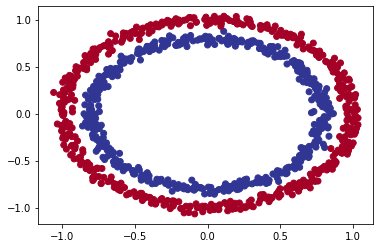

In [39]:
# visualize the dataset
plt.scatter(circles["x0"],circles["x1"],c=y,cmap=plt.cm.RdYlBu)

In [45]:
len(x),len(y)

(1000, 1000)

In [47]:
x.shape,y.shape

((1000, 2), (1000,))

In [51]:
# Modeling the neural network
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

model.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 4.0250 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7577 - accuracy: 0.4950
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7109 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4880


In [53]:
model.fit(x,y,epochs=200,verbose=0)

In [57]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

model.fit(x,y,epochs=200,verbose=0)

In [58]:
model.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 1.0000


[0.008877059444785118, 1.0]

In [59]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

model.fit(x,y,epochs=200,verbose=0)

In [60]:
model.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000


[0.0024169469252228737, 1.0]

In [61]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               300       
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________
